## 1. Rule Based

In [5]:
simplest_grammar = """
number = number number | single_number
single_number = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0 
"""

In [6]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article => 一个 | 这个
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐在 | 听着 | 看见
Adj => 蓝色的 | 好看的 | 小小的
"""

In [7]:
import random

In [8]:
def adj():
    return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]
adj() + adj()

'好看的好看的'

In [9]:
def adj_star():
    return random.choice(['null', adj() + adj()])

In [10]:
adj_star()

'小小的蓝色的'

In [11]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): 
            continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [12]:
example_grammar = create_grammar(simple_grammar)

In [13]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [35]:
import random
def generate(gram, target):
    if target not in gram:
        return target
    expanded = [generate(gram ,t) for t in random.choice(gram[target])]
    print(expanded)
    print(''.join([e if e != '/n' else '\n' for e in expanded if e != 'null']))
    print('=====')
    return ''.join([e if e != '/n' else '\n' for e in expanded if e != 'null'])

In [36]:
generate(gram=example_grammar, target='sentence')

['一个']
一个
=====
['null']

=====
['女人']
女人
=====
['一个', '', '女人']
一个女人
=====
['听着']
听着
=====
['一个']
一个
=====
['null']

=====
['女人']
女人
=====
['一个', '', '女人']
一个女人
=====
['听着', '一个女人']
听着一个女人
=====
['一个女人', '听着一个女人']
一个女人听着一个女人
=====


'一个女人听着一个女人'

In [13]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [14]:
create_grammar(human, split='=')

{'human': [['自己', '寻找', '活动']],
 '自己': [['我'], ['俺'], ['我们']],
 '寻找': [['找找'], ['想找点']],
 '活动': [['乐子'], ['玩的']]}

In [15]:
for _ in range(10):
    print(generate(gram=create_grammar(human, split='='), target='human'))

我们想找点玩的
我找找玩的
俺想找点乐子
我找找乐子
我们找找乐子
我想找点玩的
我找找乐子
我想找点乐子
俺想找点玩的
俺找找玩的


## Data Driven

In [16]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => a | b | c  | d | e
number => 1 | 2 | 3
"""

In [21]:
print(generate(create_grammar(programming, '=>'), 'stmt'))

while(ae2){
....while(b2){
....ba3=c3}}


## Probability Based

## Language Model

$$ language\_model(String) = Probability(String) \in (0, 1) $$

$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$ 

$$ 马尔科夫假设：任意词出现的概率只与其前一个词有关 $$

$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 

In [25]:
import jieba
def cut(string): 
    return list(jieba.cut(string))

In [56]:
TOKEN = []

In [86]:
t = []
with open('test_file_2.txt', 'w',encoding='utf-8') as f:
    for _, line in enumerate((open('article_9k.txt',encoding='utf-8'))):
        f.write(line)
    print('Done')

Done


In [ ]:
for i, line in enumerate((open('test_file_2.txt',encoding='utf-8'))):
    if i % 100 == 0:
        print(i)
    if i > 5000:
        break
    TOKEN += cut(line)

In [104]:
from collections import Counter
words_count = Counter(TOKEN)
test = Counter([1,2,2,3,3,4,4,1010,1010,111,111,111,111])
test

Counter({1: 1, 2: 2, 3: 2, 4: 2, 1010: 2, 111: 4})

In [ ]:
words_count.most_common(100)

In [95]:
frequiences = [f for w, f in words_count.most_common(100)]

In [96]:
x = [i for i in range(100)]

In [97]:
%matplotlib inline

In [98]:
import matplotlib.pyplot as plt

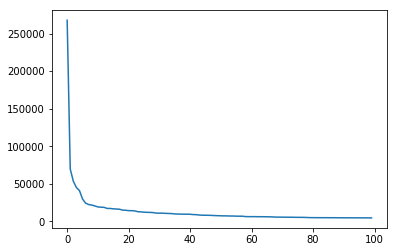

In [99]:
plt.plot(x, frequiences)

In [100]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [102]:
prob_1('我们')

0.0016455472069963663

In [103]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [105]:
TOKEN = [str(t) for t in TOKEN]

In [117]:
TOKEN[:10]
Counter(TOKEN)['我们']

8550

In [107]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [108]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [109]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [122]:
def prob_2(word1, word2):
    if word1+word2 in words_count_2:
        return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
#      《数学之美》中关于p(w2|w1)的计算
#         return words_count_2[word1+word2] / Counter(TOKEN)[word1]
    else:
        return 1 / len(TOKEN_2_GRAM)

In [123]:
prob_2('我们', '在')

5.0040051287203334e-05

In [124]:
prob_2('去', '吃饭')

1.9246173572001282e-07

In [126]:
def get_probability(sentence):
    words = cut(sentence)
    sentence_pro = 1
    for _, word in enumerate(words[:-1]):
        next_ = words[_+1]
        probability = prob_2(word, next_)
        sentence_pro *= probability
    return sentence_pro

In [128]:
get_probability('小明今天抽奖抽到一架飞机')

7.922153363312084e-34

In [129]:
get_probability('养乐多来一杯')

3.704151971636006e-14

In [133]:
for sentence in [generate(example_grammar, target='sentence') for i in range(10)]:
    print(f"Sentence: {sentence} with probability of: {get_probability(sentence)}")

Sentence: 这个蓝色的桌子看见这个桌子 with probability of: 8.538383766881816e-39
Sentence: 这个女人听着这个好看的女人 with probability of: 3.726092943400033e-42
Sentence: 一个小小的篮球坐在一个小小的小小的好看的桌子 with probability of: 3.652246786525693e-58
Sentence: 一个桌子看见这个小猫 with probability of: 8.232445097384947e-27
Sentence: 这个桌子听着一个蓝色的蓝色的桌子 with probability of: 4.791747783921711e-54
Sentence: 一个桌子看见一个篮球 with probability of: 2.058111274346237e-26
Sentence: 这个桌子看见这个好看的小小的蓝色的篮球 with probability of: 1.8087317418984383e-57
Sentence: 这个蓝色的小猫看见一个小猫 with probability of: 9.148268321659087e-39
Sentence: 一个小小的好看的桌子看着一个蓝色的好看的小小的小猫 with probability of: 1.6663770822983065e-76
Sentence: 这个好看的好看的好看的小小的好看的蓝色的蓝色的好看的蓝色的篮球看见一个小猫 with probability of: 8.818188061915589e-127


In [135]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probability(s1), get_probability(s2)
    
    better = s1 if p1 > p2 else s2
    print(f"{better} is more possible.")
    print(f"{'-'*4} {s1} with probability {p1}")
    print(f"{'-'*4} {s2} with probability {p2}")

今天晚上请你吃大餐，我们一起吃日料 is more possible.
---- 今天晚上请你吃大餐，我们一起吃日料 with probability 4.47356943163574e-63
---- 明天晚上请你吃大餐，我们一起吃苹果 with probability 1.4911898105452462e-63
真是一只好看的小猫 is more possible.
---- 真事一只好看的小猫 with probability 1.2675445381299334e-32
---- 真是一只好看的小猫 with probability 6.585956077907958e-26
今晚我去吃火锅 is more possible.
---- 今晚我去吃火锅 with probability 5.418097135521478e-19
---- 今晚火锅去吃我 with probability 1.3446326992395413e-25
养乐多绿来一杯 is more possible.
---- 洋葱奶昔来一杯 with probability 7.129075178317735e-21
---- 养乐多绿来一杯 with probability 3.704151971636006e-14
